### Graph Query Formulator
Exploring the idea of generating optimal queries for elasticsearch using a graph datastructure that contains the ontologies of different courses and thus, acts like a knowledge graph.

In [94]:
import pickle
import json

import networkx as nx
import nltk
import matplotlib.pyplot as plt

In [135]:
kg = nx.DiGraph()

In [136]:
# Subject and Course nodes
kg.add_node("Computer Science", NodeType = "SubjectNode")
kg.add_node("Introduction to Algorithms", NodeType = "CourseNode")

In [137]:
# Topic 1 -- Sorting
kg.add_node("Sorting", NodeType = "TopicNode")
kg.add_node("Insertion Sort, Bubble Sort", NodeType = "ConceptNode")
kg.add_node("Merge Sort, Quick Sort", NodeType = "ConceptNode")
kg.add_node("Radix Sort, Counting Sort", NodeType = "ConceptNode")

In [138]:
# Topic 2 -- Algorihtms
kg.add_node("Algorithmic Complexity", NodeType = "TopicNode")
kg.add_node("Big Oh Notation", NodeType="ConceptNode")
kg.add_node("Analysis of Algorithms", NodeType="ConceptNode")

In [139]:
# Topic 1 -- Edges
kg.add_edge("Computer Science", "Introduction to Algorithms")
kg.add_edge("Introduction to Algorithms", "Sorting")
kg.add_edge("Sorting", "Insertion Sort, Bubble Sort")
kg.add_edge("Sorting", "Merge Sort, Quick Sort")
kg.add_edge("Sorting", "Radix Sort, Counting Sort")

In [140]:
# Topic 2 -- Edges
kg.add_edge("Introduction to Algorithms", "Algorithmic Complexity")
kg.add_edge("Algorithmic Complexity", "Big Oh Notation")
kg.add_edge("Algorithmic Complexity","Analysis of Algorithms")

In [149]:
kg.add_edge("Sorting", "Analysis of Algorithms")

/Users/rishabh/.virtualenvs/tween/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/rishabh/.virtualenvs/tween/lib/python3.4/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/rishabh/.virtualenvs/tween/lib/python3.4/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/rishabh/.virtualenvs/tween/lib/python3.4/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be

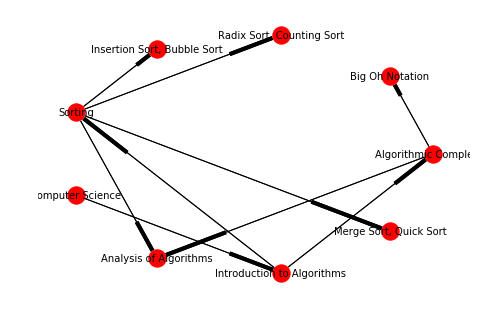

In [185]:
def draw_graph(kg):
    pos=nx.circular_layout(kg) # positions for all nodes
    nx.draw(kg, pos, node_color='w',
            width=1.0, 
            edge_cmap=plt.cm.Blues,
           with_labels=True, font_size=10)

    nx.draw(kg, pos, font_size=10, arrows=True)
    plt.show()
draw_graph(kg)

In [182]:
def get_closest_distance_node(query, kg):
    nodes = kg.nodes()
    mi, val = None, None
    for node in nodes:
        dist = nltk.distance.edit_distance(node, query)
        if(mi == None or dist < mi): 
            mi = dist
            val = node
        if(query in node and kg.node[node]["NodeType"] == "ConceptNode"): return node
    return val

def get_closest_node(query, kg):
    if(query in kg): 
        return query, kg.node[query]
    else: 
        node_label = get_closest_distance_node(query, kg)
        return node_label, kg.node[node_label]

In [184]:
def query_formulator(kg, query):
    queries = []
    current_node, node = get_closest_node(query, kg)
    children_neighbours = kg.neighbors(current_node)
    
    for child in children_neighbours:
        queries.append(current_node+" "+child)
    return queries

In [181]:
query_formulator(kg, "Radix Sort")

Radix Sort, Counting Sort


[]

In [83]:
kg.node["Computer Science"]

{'NodeType': 'SubjectNode'}

In [165]:
import gensim